In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [8]:
# Data preparation
df=pd.read_csv("train.csv")
data=df.values
X=data[:,1:]
Y=data[:,0]
print(X.shape)
print(Y.shape)
print(data.shape)

(42000, 784)
(42000,)
(42000, 785)


In [36]:
split=int(0.8*X.shape[0])
x_train=X[:split,:]
y_train=Y[:split]
x_test=X[split:,:]
y_test=Y[split:]
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(33600, 784)
(33600,)
(8400, 784)
(8400,)


In [11]:
# KNN
def dist(x1,x2):
    return np.sqrt(abs(sum((x1-x2)**2)))
def knn(X,Y,query_x,k=5):
    vals=[]
    m=X.shape[0]
    for i in range(m):
        d=dist(query_x,X[i])
        vals.append((d,Y[i]))
    vals=sorted(vals)
    vals=vals[:k]
    vals=np.array(vals)
    new_vals=np.unique(vals[:,1],return_counts=True)
    index=new_vals[1].argmax()
    pred=new_vals[0][index]
    return pred

5.0


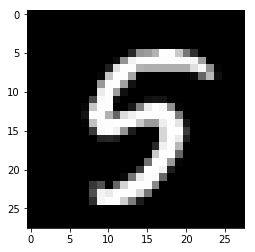

In [17]:
plt.imshow(X[8].reshape(28,28),cmap='gray')
print(knn(X,Y,X[8]))

In [38]:
cnt=0.0
for i in range(100):
    pred=knn(x_train,y_train,x_test[i])
    if(pred==y_test[i]):
        cnt+=1
print("Accuracy is :{}".format((cnt/100)*100))

Accuracy is :96.0


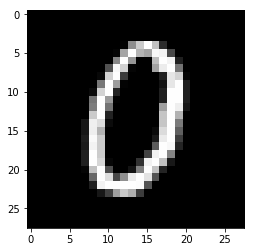

In [28]:
plt.imshow(X[5].reshape(28,28),cmap='gray')